### IDs:
Insert yours IDs to the cell below

ID #1: 301672028

ID #2: 204502926


## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. You are free to add cells.
1. Write your functions and your answers in this jupyter notebook only.
1. Answers to theoretical questions should be written in **markdown cells (with $\LaTeX$ support)**.
1. Submit this jupyter notebook only using your ID as a filename. Not to use ZIP or RAR. For example, your Moodle submission file name should look like this (two id numbers): `123456789_987654321.ipynb`.

#### IMPORTS

In [706]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats # pearsonr, kendalltau, spearmanr etc.
import time

### Question 1 - Correlations (15 points)

Provide example datapoints matching the following descriptions. Each example should be constructed over n=50 datapoints. Provide a table description of the example data as well as a jointplot (see example below). 
If you think that the situation described is impossible then clearly explain why (you don’t need to give a rigorous proof).<br>
Pearson(x,y) = Pearson correlation<br>
τ(x,y) = Kendall rank correlation<br>
ρ(x,y) = Spearman rank correlation <br>
<img src="jointplot.png">

#### Answer:

In [2]:
n = 50 # 50 datapoints

def print_table_and_jointplot(x, y, d = True):
    # table description of the example data
    table = pd.DataFrame(np.vstack((x,y)).T, columns = ['x', 'y'])
    
    if d != False:
        table['d_i'] = table['x'] - table['y']
    
    print(table)

    p = sns.jointplot(data=table, x=x, y=y, marker='+')
    p.fig.suptitle('x & y values JointPlot', fontsize=25)
    p.fig.subplots_adjust(top=0.9) # Reduce plot to make room for title

For each section, we create x and y vectors of size n each.

#### 1.A
Data in which  $Pearson(x,y) < -0.9$ but where $n-1$ points can be selected so that for the vectors restricted to those we have $Pearson(x_{n-1},y_{n-1}) > -0.2$

Overall Pearson correlation between x & y is -0.999998000834983
Excluding the last value of each, we get 1.0

        x      y
0   0.000  0.000
1   0.000  0.000
2   0.000  0.000
3   0.000  0.000
4   0.000  0.000
5   0.000  0.000
6   0.000  0.000
7   0.000  0.000
8   0.000  0.000
9   0.000  0.000
10  0.000  0.000
11  0.000  0.000
12  0.000  0.000
13  0.000  0.000
14  0.000  0.000
15  0.000  0.000
16  0.000  0.000
17  0.000  0.000
18  0.000  0.000
19  0.000  0.000
20  0.000  0.000
21  0.000  0.000
22  0.000  0.000
23  0.000  0.000
24  0.000  0.000
25  0.000  0.000
26  0.000  0.000
27  0.000  0.000
28  0.000  0.000
29  0.000  0.000
30  0.000  0.000
31  0.000  0.000
32  0.000  0.000
33  0.000  0.000
34  0.000  0.000
35  0.000  0.000
36  0.000  0.000
37  0.000  0.000
38  0.000  0.000
39  0.000  0.000
40  0.000  0.000
41  0.000  0.000
42  0.000  0.000
43  0.000  0.000
44  0.000  0.000
45  0.000  0.000
46  0.000  0.000
47  0.000  0.000
48  0.001  0.001
49 -1.000  1.000


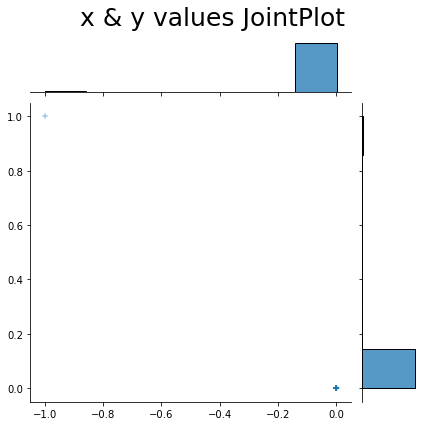

In [3]:
x = np.zeros(n)
y = np.zeros(n)

x[n-2] = 0.001
y[n-2] = 0.001

# these are the last values we will exclude
x[n-1] = -1
y[n-1] = 1

overall_correlation = stats.pearsonr(x, y)[0]
partial_correlation = stats.pearsonr(x[:n-1], y[:n-1])[0]

print(f'\
Overall Pearson correlation between x & y is {overall_correlation}\n\
Excluding the last value of each, we get {partial_correlation}\n')

print_table_and_jointplot(x, y, d=False)

#### 1.B
Data with τ(x,y) > ρ(x,y) + 0.45

***
All n ranks are distinct integers, so Spearman can be computed with the popular formula:
$$
\rho=1-\frac{6 \sum d_{i}^{2}}{n\left(n^{2}-1\right)}
$$
Where $d_i = rank(x_i) - rank(y_i)$<br>
So in our case, we need to "mess" with it such that the ranks will not all increase together, so we split it to two increasing lines
and therefore, the distances are quite large (all are of size 25, with pluses and minuses, see table below), so the correlation value will be relatively small.

Kendall correlation simply subtracts the number of discordant from concordant pairs, so the squaring of d's in Spearman has a larger effect on the resulting correlation value.
And also, there are many concordant pairs

Kendall correlation between x & y is -0.020408163265306124
Spearman correlation between x & y is -0.5006002400960383
Kendall > Spearman by 0.4801920768307322

       x     y   d_i
0    1.0  26.0 -25.0
1    2.0  27.0 -25.0
2    3.0  28.0 -25.0
3    4.0  29.0 -25.0
4    5.0  30.0 -25.0
5    6.0  31.0 -25.0
6    7.0  32.0 -25.0
7    8.0  33.0 -25.0
8    9.0  34.0 -25.0
9   10.0  35.0 -25.0
10  11.0  36.0 -25.0
11  12.0  37.0 -25.0
12  13.0  38.0 -25.0
13  14.0  39.0 -25.0
14  15.0  40.0 -25.0
15  16.0  41.0 -25.0
16  17.0  42.0 -25.0
17  18.0  43.0 -25.0
18  19.0  44.0 -25.0
19  20.0  45.0 -25.0
20  21.0  46.0 -25.0
21  22.0  47.0 -25.0
22  23.0  48.0 -25.0
23  24.0  49.0 -25.0
24  25.0  50.0 -25.0
25  26.0   1.0  25.0
26  27.0   2.0  25.0
27  28.0   3.0  25.0
28  29.0   4.0  25.0
29  30.0   5.0  25.0
30  31.0   6.0  25.0
31  32.0   7.0  25.0
32  33.0   8.0  25.0
33  34.0   9.0  25.0
34  35.0  10.0  25.0
35  36.0  11.0  25.0
36  37.0  12.0  25.0
37  38.0  13.0  25.0
38  39.0  14.0  25.0
3

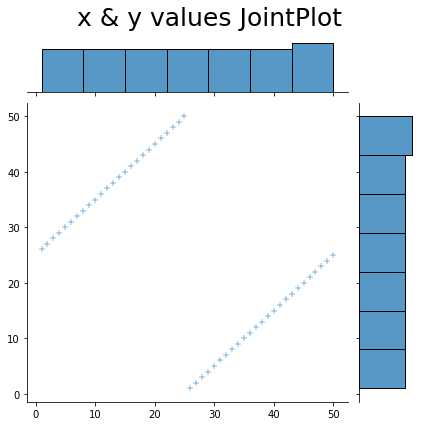

In [4]:
x = np.arange(n) + 1
y = np.empty(n)

y[0:25] = (np.arange(25) + 1) + 25
y[25:] = (np.arange(25) + 1)

kendall_correlation = stats.kendalltau(x, y)[0]
spearman_correlation = stats.spearmanr(x, y)[0]

print(f'\
Kendall correlation between x & y is {kendall_correlation}\n\
Spearman correlation between x & y is {spearman_correlation}\n\
Kendall > Spearman by {kendall_correlation - spearman_correlation}\n')

print_table_and_jointplot(x, y)

#### 1.C
Data with τ(x,y) < ρ(x,y) – 0.45

***
Here, we reverse y values (change the slope from 1.B to its negative value) so the $d_i$'s are much smaller than those in section 1.B and thus the result is much larger (values are from 0-25, with pluses and minuses, see table below).<br>
The concordant and discordant pairs here are exactly opposite to 1.B, hence the minus of Kendall's previous value.

Kendall correlation between x & y is 0.020408163265306124
Spearman correlation between x & y is 0.5006002400960383
Kendall < Spearman by 0.4801920768307322

       x     y   d_i
0    1.0  25.0 -24.0
1    2.0  24.0 -22.0
2    3.0  23.0 -20.0
3    4.0  22.0 -18.0
4    5.0  21.0 -16.0
5    6.0  20.0 -14.0
6    7.0  19.0 -12.0
7    8.0  18.0 -10.0
8    9.0  17.0  -8.0
9   10.0  16.0  -6.0
10  11.0  15.0  -4.0
11  12.0  14.0  -2.0
12  13.0  13.0   0.0
13  14.0  12.0   2.0
14  15.0  11.0   4.0
15  16.0  10.0   6.0
16  17.0   9.0   8.0
17  18.0   8.0  10.0
18  19.0   7.0  12.0
19  20.0   6.0  14.0
20  21.0   5.0  16.0
21  22.0   4.0  18.0
22  23.0   3.0  20.0
23  24.0   2.0  22.0
24  25.0   1.0  24.0
25  26.0  50.0 -24.0
26  27.0  49.0 -22.0
27  28.0  48.0 -20.0
28  29.0  47.0 -18.0
29  30.0  46.0 -16.0
30  31.0  45.0 -14.0
31  32.0  44.0 -12.0
32  33.0  43.0 -10.0
33  34.0  42.0  -8.0
34  35.0  41.0  -6.0
35  36.0  40.0  -4.0
36  37.0  39.0  -2.0
37  38.0  38.0   0.0
38  39.0  37.0   2.0
39 

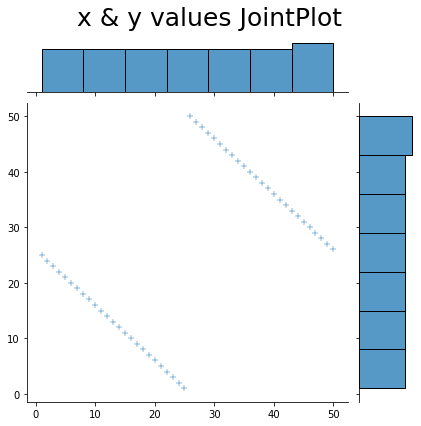

In [5]:
x = np.arange(n) + 1
y = np.empty(n)

y[0:25] = (np.arange(25) + 1)[::-1] # reverse -> number are decreasing
y[25:] = (np.arange(25) + 1)[::-1] + 25

kendall_correlation = stats.kendalltau(x, y)[0]
spearman_correlation = stats.spearmanr(x, y)[0]

print(f'\
Kendall correlation between x & y is {kendall_correlation}\n\
Spearman correlation between x & y is {spearman_correlation}\n\
Kendall < Spearman by {spearman_correlation - kendall_correlation}\n')

print_table_and_jointplot(x, y)

#### 1.D
Data with Pearson(x,y) < ρ(x,y) – 0.6

***
Pearson "seeks" perfect linearity between x and y (in order to be 1 or -1 for example), while Spearman cares only for the order of the ranks.<br>
So we can simply make the graph non-linear monotonically increasing.

We saw a similar example in class (lecture "p-Values and introduction to correlations", slide 37).

Pearson correlation between x & y is 0.3525162104692502
Spearman correlation between x & y is 0.9565343606966125
Pearson < Spearman by 0.6040181502273623

       x             y           d_i
0    1.0  0.000000e+00  1.000000e+00
1    2.0  0.000000e+00  2.000000e+00
2    3.0  0.000000e+00  3.000000e+00
3    4.0  0.000000e+00  4.000000e+00
4    5.0  0.000000e+00  5.000000e+00
5    6.0  0.000000e+00  6.000000e+00
6    7.0  0.000000e+00  7.000000e+00
7    8.0  0.000000e+00  8.000000e+00
8    9.0  0.000000e+00  9.000000e+00
9   10.0  0.000000e+00  1.000000e+01
10  11.0  0.000000e+00  1.100000e+01
11  12.0  0.000000e+00  1.200000e+01
12  13.0  0.000000e+00  1.300000e+01
13  14.0  0.000000e+00  1.400000e+01
14  15.0  0.000000e+00  1.500000e+01
15  16.0  0.000000e+00  1.600000e+01
16  17.0  0.000000e+00  1.700000e+01
17  18.0  0.000000e+00  1.800000e+01
18  19.0  0.000000e+00  1.900000e+01
19  20.0  0.000000e+00  2.000000e+01
20  21.0  0.000000e+00  2.100000e+01
21  22.0  0.000000e+00  2.20000

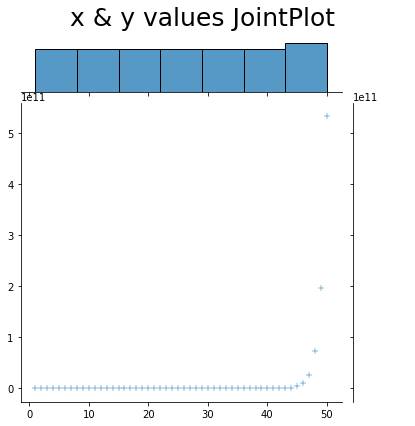

In [8]:
x = np.arange(n) + 1
y = np.zeros(n)

# When passing x, it takes too long to run, and a tail of 28 (n - index) is enough for the desired difference
index = 22
y[index:] = np.exp((np.arange(n - index)))

pearson_correlation = stats.pearsonr(x, y)[0]
spearman_correlation = stats.spearmanr(x, y)[0]

print(f'\
Pearson correlation between x & y is {pearson_correlation}\n\
Spearman correlation between x & y is {spearman_correlation}\n\
Pearson < Spearman by {spearman_correlation - pearson_correlation}\n')

print_table_and_jointplot(x, y)

#### 1.E
Data with Pearson(x,y) > ρ(x,y) + 1.2

***
A little bit of playing with numbers, but in general, the goal was for x and y to be **linearly increasing** for Pearson to have a high-enough value (and so their ranks are also ordered for Spearman),<br>
but for the distance, $d$, between corresponding ranks to be large and for one entry to be extremely detached - this will "hurt" Spearman more than Pearson, because Spearman is more sensitive to a big mismatch (unorder) in the data,<br>

Pearson correlation between x & y is 0.41839142784428485
Spearman correlation between x & y is -0.8823529411764706
Pearson > Spearman by 1.3007443690207554

        x          y        d_i
0     1.0   1.000000   0.000000
1     2.0   0.979592   1.020408
2     3.0   0.959184   2.040816
3     4.0   0.938776   3.061224
4     5.0   0.918367   4.081633
5     6.0   0.897959   5.102041
6     7.0   0.877551   6.122449
7     8.0   0.857143   7.142857
8     9.0   0.836735   8.163265
9    10.0   0.816327   9.183673
10   11.0   0.795918  10.204082
11   12.0   0.775510  11.224490
12   13.0   0.755102  12.244898
13   14.0   0.734694  13.265306
14   15.0   0.714286  14.285714
15   16.0   0.693878  15.306122
16   17.0   0.673469  16.326531
17   18.0   0.653061  17.346939
18   19.0   0.632653  18.367347
19   20.0   0.612245  19.387755
20   21.0   0.591837  20.408163
21   22.0   0.571429  21.428571
22   23.0   0.551020  22.448980
23   24.0   0.530612  23.469388
24   25.0   0.510204  24.489796
25   26.0  

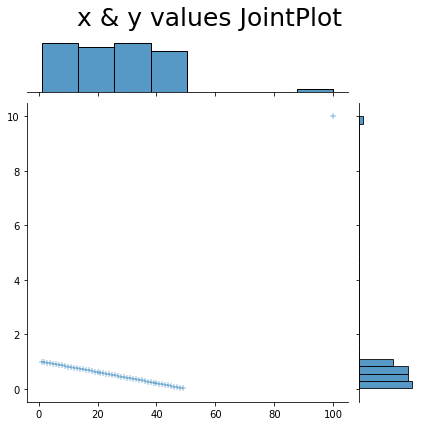

In [7]:
x = np.arange(n) + 1
y = np.linspace(0, 1, num=n)[::-1]

x[n-1] = 100
y[n-1] = 10

pearson_correlation = stats.pearsonr(x, y)[0]
spearman_correlation = stats.spearmanr(x, y)[0]

print(f'\
Pearson correlation between x & y is {pearson_correlation}\n\
Spearman correlation between x & y is {spearman_correlation}\n\
Pearson > Spearman by {pearson_correlation - spearman_correlation}\n')

print_table_and_jointplot(x, y)

#### 1.F
Data with τ(x,y) < ρ(x,y) – 1.2 

The situation described is impossible because a difference bigger than 1 indicates that the 2 correlation values have a different sign (since they can only be in the range [-1,1]).<br>
Since both Kendall and Spearman correlation measures are rank-based, there is no scenario where they can have a different sign.

### Question 2 - Analysis of the UCI Heart Disease dataset  (40 points)

Perform data analysis on the UCI Heart Disease Dataset
References:
1. Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J., Sandhu, S., Guppy, K., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. American Journal of Cardiology, 64,304--310.
2. David W. Aha & Dennis Kibler. "Instance-based prediction of heart-disease presence with the Cleveland database."
3. Gennari, J.H., Langley, P, & Fisher, D. (1989). Models of incremental concept formation. Artificial Intelligence, 40, 11--61.

Use the following links to find the details of the data: 
1. https://archive.ics.uci.edu/ml/datasets/heart+disease
2. https://www.kaggle.com/ronitf/heart-disease-uci

In the follwong cells write a report for your analysis. In your report provide a clear description of the analysis methods and of the results. This should include a graphical representation of the results and the conclusions. Provide p-values or other indicators of the statistical significance where appropriate. <br>
Design your report to be concise but still cover interesting findings.

There are missing values in the data. Find them and impute them by using the median (for numerical features) or the mode (for categorical features) value of the relevant feature (column).
Address the following questions:
* Using confidence intervals determine for which numerical features you can state with confidence of 95% that the healthy population (target = 0) mean is larger/smaller than the disease population (target = 1) mean. 
* Draw histograms for each numerical feature. Inspect the observed distributions and then use MLE to plot, on the same figures, fits of the distributions.
* For each pair of numerical feature, calculate correlations and indicate whether you find them significant. For select pairs, with significant correlations, draw joint plot with marginal histograms (see Seaborn joint plot) and find bivariate normal fits. Then use the example code below to draw plots of the bivariate pdfs (you may edit the code as you see fit).
* Are there pairs that are significantly correlated in males but not in females? The opposite? How about healthy vs disease? Can you graphically represent this?
* For each numerical feature, except age, plot the distribution for this feature against bins of age. In each bin provide a split violin plot, with different colors for healthy and disease.

Suggest, state and address at least one original question.


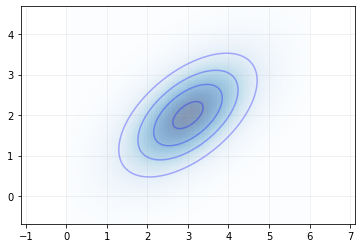

In [1]:
# Example code for bivariate pdfs
from scipy.stats import multivariate_normal as mn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def plot_2d_Gaussian_pdf(means, cov):
    n = 100
    x1 = np.linspace(means[0] - 3 * np.sqrt(cov[0][0]), means[0] + 3 * np.sqrt(cov[0][0]), n)
    x2 = np.linspace(means[1] - 3 * np.sqrt(cov[1][1]), means[1] + 3 * np.sqrt(cov[1][1]), n)
    x1_v, x2_v = np.meshgrid(x1, x2)
    Xgrid = np.vstack([x1_v.ravel(), x2_v.ravel()]).T
    Y = mn.pdf(Xgrid, means, cov)
    fig, ax = plt.subplots()
    ax.pcolorfast(x1, x2, Y.reshape(x1_v.shape), alpha=0.5, cmap='Blues')
    ax.contour(x1_v, x2_v, Y.reshape(x1_v.shape),
               levels=[0.05, 0.1, 0.15, 0.2], alpha=0.3, colors='b')
    ax.axis('equal')
    ax.grid(alpha=0.2)
    plt.show()
    
means = [3, 2]
cov = [[1, 0.5], [0.5, 0.8]]
plot_2d_Gaussian_pdf(means, cov)

### Question 3 - Heavy Tailed distributions (10 points)

Recall the definition of Heavy Tailed distribtion from the lectures.

*A distribution is said to have a heavy right tail if its tail probabilities vanish slower than any exponential*
$$ \forall t>0, \lim_{x\to\infty} e^{tx}P(X>x)=\infty $$

#### 3.A
Does the standard normal distribution have a heavy right tail? prove your answer.

#### 3.B
Does the standard log-normal distribution have a heavy right tail? prove your answer.

### Question 4 - CLT for Markov chains (20 points)

In this exercise you will construct trajectories of Markovian dice rolling results in the following way.<br>
The first roll, $X_0$, is $U(1...6)$, i.e. $P(X_0=i)=\pi_0(i)=1/6, \forall i\in{\{1,..,6\}}$<br>
After i rolls are determined the $i+1^{st}, X_{i+1},$ is drawn according to the row that corresponds to the value of $X_i$ in the matrix $T$ below. <br>
In other words, $T$ is the transition matrix of a Markov chain and the initial distribution is uniform.

\begin{equation*}
T = 
\begin{pmatrix}
0.4 & 0.2 & 0.1 & 0 & 0.1 & 0.2 \\
0.2 & 0.4 & 0.2 & 0.1 & 0 & 0.1 \\
0.1 & 0.2 & 0.4 & 0.2 & 0.1 & 0 \\
0 & 0.1 & 0.2 & 0.4 & 0.2 & 0.1 \\
0.1 & 0 & 0.1 & 0.2 & 0.4 & 0.2 \\
0.2 & 0.1 & 0 & 0.1 & 0.2 & 0.4
\end{pmatrix}
\end{equation*}

In [628]:
# Build T
T = []
row = [0.4, 0.2, 0.1, 0, 0.1, 0.2]

for i in range(len(row) - 1):
    T.append(row)
    row = [row[len(row) -1]] + row[:-1]
T.append(row)

T = np.matrix(T)
print(f'T:\n{T}')
###

initial_probabilities = np.ones(6) / 6 # [1/6, ..., 1/6]
possible_values = np.arange(1, 7, 1) # 1 to 6

T:
[[0.4 0.2 0.1 0.  0.1 0.2]
 [0.2 0.4 0.2 0.1 0.  0.1]
 [0.1 0.2 0.4 0.2 0.1 0. ]
 [0.  0.1 0.2 0.4 0.2 0.1]
 [0.1 0.  0.1 0.2 0.4 0.2]
 [0.2 0.1 0.  0.1 0.2 0.4]]


#### 4.A
Construct 1000 trajectories, each of length 30.
1. What do you expect the average value of all 30 numbers in a trajectory to be?
2. Compute the average value of each such trajectory. Draw a histogram of the 1000 numbers you received, using 20 bins.
3. What does the distribution look like? What are the empirical mean and the std?
***

1. We expect the average value of all 30 numbers in a trajectory to be 3.5 because we simply roll a fair die 30 times, and 3.5 is the avrage result of it.

In [665]:
# 2

np.random.seed(0) # for consistency


def compute_trajectory(length):
    probabilities = initial_probabilities # the initial distribution is uniform and only after it changes
    trajectory = np.zeros(length).astype(int)
    
    for i in range(length):
        trajectory[i] = np.random.choice(possible_values, p = probabilities) # We take a random result for the toss, given the current probabilities for the current X_i
        probabilities = np.array(T[trajectory[i] - 1]).ravel() # override previous probabilites with the next probabilities in current row in T
    
    return trajectory


def compute_averages_and_plot(trajectories = 1000, length = 30):
    trajectories_list = []

    for i in range(trajectories):
        trajectories_list.append(compute_trajectory(length))

    # The average value of each such trajectory
    averages = np.average(trajectories_list, axis = 1)

    # Draw a histogram of the 1000 numbers you received, using 20 bins
    fig = plt.figure(figsize=(22, 6))
    plt.hist(averages, bins=20, density=True, label='Trajectories averages')

    mean = np.mean(averages)
    std = np.std(averages)

    # we plot also a Normal Dist. curve with the same mean and std to show similarity with our results
    x = np.linspace(np.min(averages), np.max(averages))
    y = stats.norm.pdf(x, mean, std) 
    plt.plot(x, y, label='Normal Distribution curve')

    # plt.ylabel('???', fontsize=13)
    plt.xlabel('Average value', fontsize=13)
    plt.title('Trajectories averages histogram', fontsize=20)
    plt.legend(loc='upper left')
    plt.show()
    
    return averages, mean, std

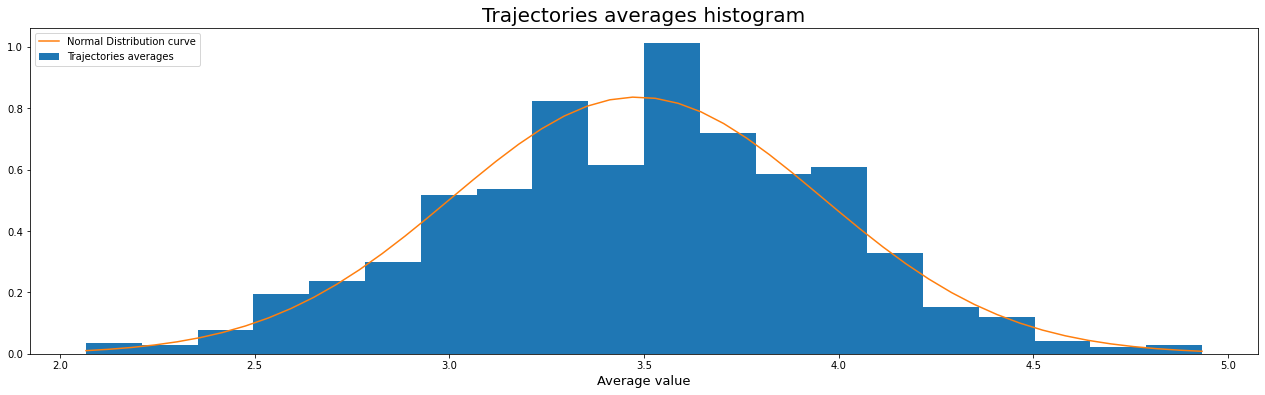

In [666]:
a_averages, a_mean, a_std = compute_averages_and_plot(trajectories = 1000, length = 30)

3. The distribution looks like the Normal distribution, and as we know - all distributions tend to converge to the Normal Distribution with enough samples becasue of the Central Limit Theorem.<br>
So the CLT is also true to Markov chains, as Zohar stated in class.

In [672]:
print(f'A.\nThe empirical mean is {a_mean} which is very close to our initial estimate of 3.5.\nThe empirical std is {a_std}')

A.
The empirical mean is 3.4820666666666664 which is very close to our initial estimate of 3.5.
The empirical std is 0.47714958753926306


##### 4.B
Construct 1000 trajectories, each of length 500.
1. What do you expect the average value of all 500 numbers in a trajectory to be?
2. Compute the average value of each such trajectory. Draw a histogram of the 1000 numbers you received, using 20 bins.
3. What does the distribution look like? What are the empirical mean and the std?

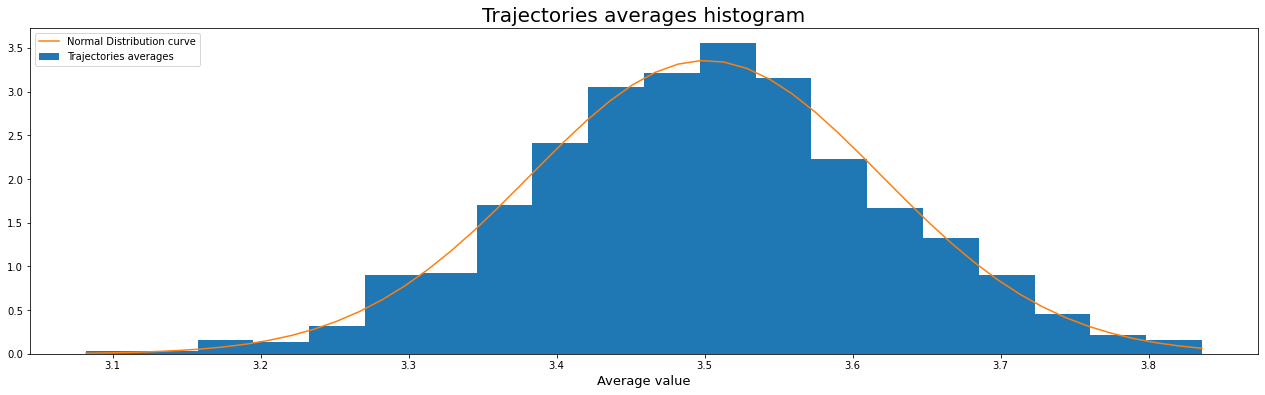

In [668]:
b_averages, b_mean, b_std = compute_averages_and_plot(trajectories = 1000, length = 500)

3. Same as 4A.2

In [673]:
print(f'B.\nThe empirical mean is {b_mean} which is very close to our initial estimate of 3.5.\nThe empirical std is {b_std}')

B.
The empirical mean is 3.50072 which is very close to our initial estimate of 3.5.
The empirical std is 0.118868438199549


#### 4.C
Draw normal fit curves on your two histograms.

In [676]:
# Done in the previous sections. Please see plots above.

#### 4.D
Write a python code to calculate $Cov(X_0,X_i)$ for $i=1,..,500$ based on $\pi_0$ and $T$. 

Compute the values for our case.

***
We'll calculate using the formula of Covariance:
$$
Cov(X, Y) = E(XY) - E(X)E(Y)
$$

For each $X_i$ we can calculate $E(X_i)$ from the corresonding row in T[i]....

In order to calculate $E(X_0X_i)$ we need to <br>
Our initial distribution vector is $\pi_0 = [1, 2, 3, 4, 5, 6]$<br>
$\pi_k = \pi_0 * T^k$<br>
$T^{(k)} = T^k$<br>

This Stochastic process is **stationary** since for every row $t \in T$, the distribution of any finite set of variables $(X_{i1}, X_{i2}, ..., X_{ir})$ is the same as the distribution of $(X_{i1+t}, X_{i2+t}, ..., X_{ir+t})$

In [730]:
pi_0 = initial_probabilities
result = np.matmul(pi_0, T) # sanity check that the process is indeed stationary - we expect to see the same values before and after multiplication
print(f'pi_0 = {pi_0}\nresult = {result}')

pi_0 = [0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]
result = [[0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]]


In [734]:
pi_2 = np.matmul(pi_0, T**2)
pi_2 = np.array(pi_2).ravel()
mean_2 = np.mean(pi_2)
pi_2

array([0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
       0.16666667])

In [686]:
def covariance(x, y):
    expecatiton_x = 
    expecatiton_y = 
    expecatiton_xy = 
    
    return expecatiton_xy - expecatiton_x*expecatiton_y

SyntaxError: invalid syntax (<ipython-input-686-77fa1d2c05bd>, line 2)

#### 4.E - Bonus
Let $\bar{X_n}$ be the sample average for a single trajectory of length $n$.
1. Show that **in our case**:
$$E(\bar{X_n}) =E(X_0)$$
What is it in our case ($\pi_0$ and $T$ as defined above)?
2. Show that 
$$Var(\bar{X_n}) = \frac{1}{n}\sigma_0^2 + \frac{2}{n^2}\sum_{d=1}^{n-1}(n-d)Cov(X_0, X_d)$$
Calculate it for our case.
3. Formulate the CLT for Markov Chains.
4. Graphically show that the CLT holds for n=500 in our case.

### Question 5 - Sampling of Kendall correlation (15 points)

Recall that the Naive time complexity of computing Kendall correlation is $O(n^2)$. We will investigate a sampling approach to approximate Kendall correlations efficiently. 

#### 5.A
Draw a sample of 10M samples from a bivariate distribution $(X,Y)\sim \mathcal{N}(\bf{0},S)$ with the covariance matrix $S=\begin{pmatrix} 2 & 3\\ 3 & 5 \end{pmatrix}$. <br>
Calculate the Kendall correlation $\tau(X,Y)$.
How long did this calculation take?

In [678]:
mean = [0, 0]
S = [[2, 3], [3, 5]]
n = 10 ** 7

start_time = time.time()

x, y = np.random.multivariate_normal(mean, S, n).T
kendall_correlation = stats.kendalltau(x, y)[0]

end_time = time.time()

print(f'Run time = {end_time - start_time} seconds')
print(f'Kendall Correlation tau = {kendall_correlation}')

Run time = 5.412463665008545 seconds
Kendall Correlation tau = 0.7951800898266891


#### 5.B
Sample 1,000 points from the data and calculate the Kendall correlation $\tau(U,V)$. 

In [679]:
def get_random_tau(top_range, sample_size):
    random_indices = np.random.randint(top_range, size=sample_size)
    U = [x[i] for i in random_indices]
    V = [y[i] for i in random_indices]
    sample_kendall_correlation = stats.kendalltau(U, V)[0]
    
    return sample_kendall_correlation

In [680]:
MAX = 10**7
sample_kendall_correlation = get_random_tau(MAX, 10**3)
print(f'Sample Kendall Correlation tau = {sample_kendall_correlation}')

Sample Kendall Correlation tau = 0.7852732732732733


#### 5.C
Repeat Section 5.B 1000 times and plot a histogram of the calculated $\tau(U,V)$ values. Indicate the true $\tau(X,Y)$ (calculated on the entire 10M samples) on the histogram. What are the empirical mean and standard deviation of the calculated $\tau(U,V)$ values?

In [681]:
def choose_random_samples(sample_size = 1000, iterations = 1000):
    tau_list = []

    for i in range(iterations):
        tau_list.append(get_random_tau(MAX, sample_size))
    
    return tau_list, np.mean(tau_list), np.std(tau_list)

In [682]:
c_tau_list, c_mean, c_std = choose_random_samples(sample_size = 1000, iterations = 1000)

print(f'The Kendall-tau values we sampled have a mean of {c_mean} and a standard deviation of {c_std}')

The Kendall-tau values we sampled have a mean of 0.7951740964580851 and a standard deviation of 0.006793335704537127


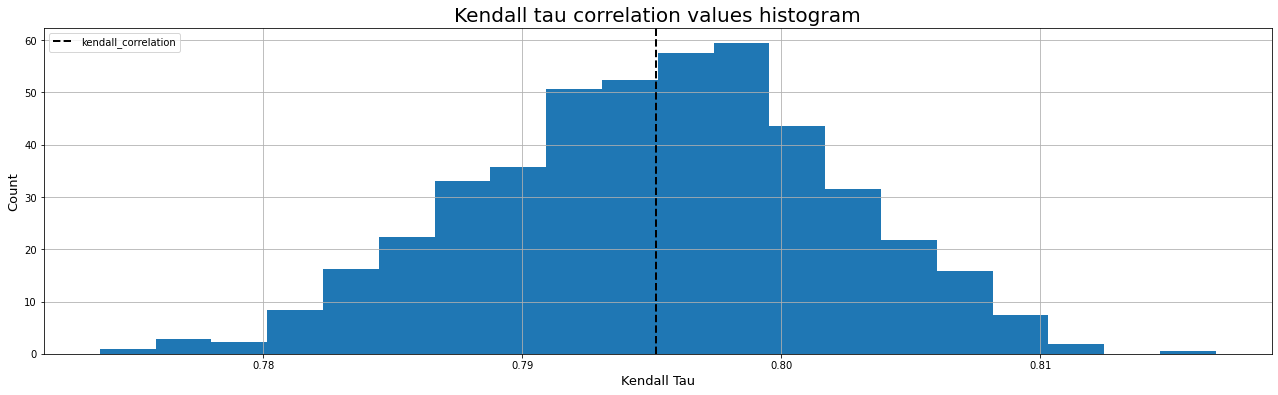

In [683]:
fig = plt.figure(figsize=(22, 6))
plt.hist(c_tau_list, density=True, bins=20)
plt.title('Kendall tau correlation values histogram', fontsize=20)
plt.ylabel('Count', fontsize=13)
plt.xlabel('Kendall Tau', fontsize=13)
plt.grid(True)
plt.axvline(kendall_correlation, color='k', linestyle='dashed', linewidth=2, label='kendall_correlation')
plt.legend(loc='upper left')

#### 5.D
Repeat Section 5.C for samples of $m={10, 50, 100, 500, 1000, 5000}$ points. <br>
What is the naive time complexity of each calculation? <br>
Compare the empirical time complexity and the standard deviation of the calucated values to the size of the sample.

In [684]:
m = [10, 50, 100, 500, 1000, 5000]
results_list = []
iterations = 1000

for sample_size in m:
    start_time = time.time()
    m_tau_list = choose_random_samples(sample_size, iterations) # 1000 iterations per m points
    end_time = time.time()
    results_list.append([end_time - start_time, m_tau_list[2]]) # the standard deviation value is at index 2

In [685]:
for i in range(len(m)):
    result_sample_size = m[i]
    result_time = results_list[i][0]
    result_std = results_list[i][1]
    print(f'The empirical time complexity of the calculation {i} (sample size = {result_sample_size}) is {result_time} seconds, and its standard deviation is {result_std}')

print(f'\nThe naive time complexity of each calculation is ')

The empirical time complexity of the calculation 0 (sample size = 10) is 0.22013545036315918 seconds, and its standard deviation is 0.10940188456182556
The empirical time complexity of the calculation 1 (sample size = 50) is 0.2352886199951172 seconds, and its standard deviation is 0.03673897186881404
The empirical time complexity of the calculation 2 (sample size = 100) is 0.28119802474975586 seconds, and its standard deviation is 0.02332623829861907
The empirical time complexity of the calculation 3 (sample size = 500) is 0.6636147499084473 seconds, and its standard deviation is 0.00991512976558278
The empirical time complexity of the calculation 4 (sample size = 1000) is 1.1308560371398926 seconds, and its standard deviation is 0.006863416654838076
The empirical time complexity of the calculation 5 (sample size = 5000) is 4.701095342636108 seconds, and its standard deviation is 0.0032159267943241633

The naive time complexity of each calculation is 


#### 5.E
A colleague found an old dataset which she believes originated from the same population as the data in Section 5.A. The dataset is avaialble as "Kendall_data.csv". 

Using Kendall correlation and your answer to Section 5.D, how much confidence do you have in rejecting your coleague's claim? Explain your answer and show your calculation.

***
We use the Significance tests (or "statistical assessment" from lecture 9) method (Kendall, 1938), as seen in class:
If two permutations are uniformly and independently drawn in $S_n$ then
$$
Z=\frac{3(C-D)}{\sqrt{0.5 * n(n-1) /(2 n+5)}}
$$
has an approximately $N(0,1)$ distribution.

In our case, the two permutations are the columns from the CSV file.

We want to see for how many of these permutations we get a tau which is the value from 5A (tau = 0.795) or larger.
We take the tau we calculated in 5A and plug it in the equation.

In [541]:
from math import comb 

kendall_data = pd.read_csv('Kendall_data.csv', header=None)
x_values = kendall_data[0].values
y_values = kendall_data[1].values

e_kendall_corr = stats.kendalltau(x_values, y_values)[0]
print(f'Kendall correlation = {e_kendall_corr}')




n = 100
C_minus_D = kendall_corr * comb(n, 2)
C = (comb(n, 2) + C_minus_D) / 2
D = comb(n, 2) - C

Z = 3 * (C - D) / np.sqrt(0.5 * n * (n - 1) / (2 * n + 5)) # TODO: FIND REAL Z
print(f'Z = {Z}')

result = 1 - stats.norm.cdf(Z, loc=0, scale=1)
result

Kendall correlation = 0.7806556689451707
Z = 2359.1757884179383


0.0